# Виконання

## Звичайна модель

### Для початку імпортуємо модулі. Завантажимо датафрейм та виведемо його вміст.

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/car_evaluation.csv')
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


*Сутності*

### Розділимо дані на тестові та навчальні.

In [117]:
x=df.drop(['class'],axis=1)
y=df['class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,x_test.shape

((1209, 6), (519, 6))

*Тестові та навчальні дані*

### Перетворимо іменовані значення у числові.

In [118]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

*Перетворення іменованих значень у числові*

### Натренуємо модель.

In [119]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

*Тренування моделі*

### Спрогнозуємо значення

In [120]:
y_pred=rfc.predict(x_test)

*Прогнозування значень*

### Виведемо класифікаційний звіт.

In [121]:
from sklearn.metrics import classification_report
common_report = classification_report(y_test, y_pred)
print(common_report)

              precision    recall  f1-score   support

         acc       0.70      0.77      0.73       111
        good       0.40      0.18      0.25        22
       unacc       0.94      0.97      0.96       368
       vgood       0.88      0.39      0.54        18

    accuracy                           0.87       519
   macro avg       0.73      0.58      0.62       519
weighted avg       0.87      0.87      0.86       519



*класифікайційний звіт*

### Побудуємо матрицю невідповідностей.

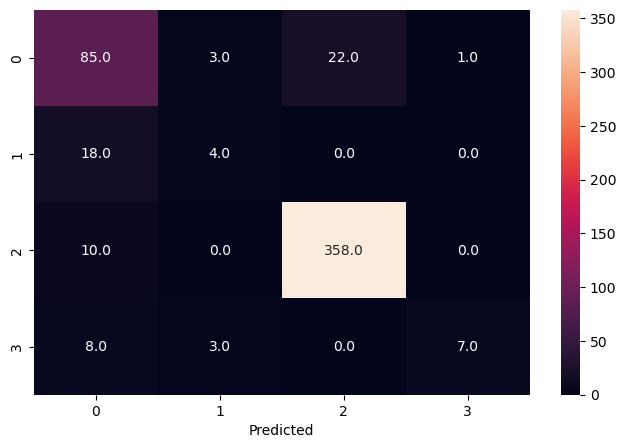

In [122]:
from sklearn.metrics import confusion_matrix
def conf_mat(model, x_test, y_test):
    y_predicted = model.predict(x_test)
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt=".1f")
    plt.xlabel('Predicted')
conf_mat(rfc, x_test, y_test)

*Матриця невідповідностей*

### Для побудови ROC застосуємо принцип "один проти всіх".

### Виведемо можливі значення класів.

In [123]:
target = y.unique()
target

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

*Значення класів*

### Бінаризуємо значення.

In [124]:
from sklearn.preprocessing import label_binarize
binarized = label_binarize(y, classes=target)
binarized[:3]

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

*Бінаризація*

### Натренуємо модель.

In [125]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

ovr_train_X, ovr_test_X, ovr_train_y, ovr_test_y = train_test_split(x,
    binarized, test_size=0.25, random_state=42)

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
ovr_train_X = encoder.fit_transform(ovr_train_X)
ovr_test_X = encoder.transform(ovr_test_X)

model = OneVsRestClassifier(RandomForestClassifier(random_state=0))\
    .fit(ovr_train_X, ovr_train_y)

/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/sideshowbobgot/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

*Тренування моделі*

### Визначення auc.

In [126]:
prob_test_vec = model.predict_proba(ovr_test_X)
 
n_classes = 4
fpr = [0] * n_classes
tpr = [0] * n_classes
thresholds = [0] * n_classes
auc_score = [0] * n_classes
 
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(ovr_test_y[:, i],
                                              prob_test_vec[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
 
auc_score

[0.9914596273291926,
 0.9250745123498687,
 0.9801577669902912,
 0.9609112709832135]

*AUC Score*

### Виведемо усереднений AUC Score.

In [127]:
sum(auc_score) / n_classes

0.9644007944131415

*Усереднений AUC Score*

### Побудуємо графік ROC.

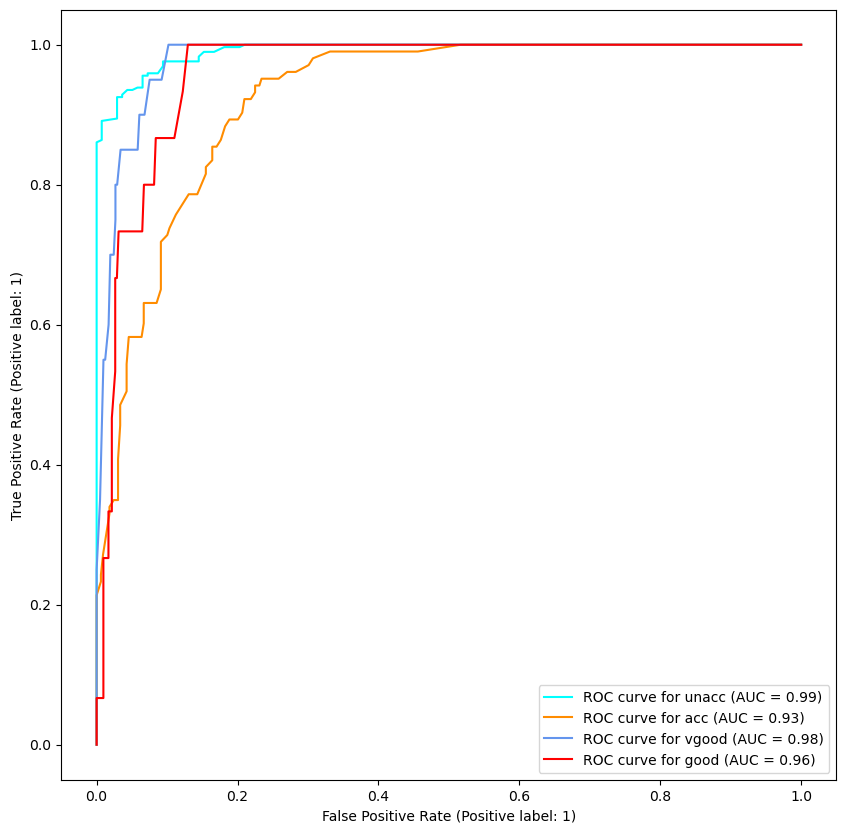

In [128]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(figsize=(10, 10))
colors = ["aqua", "darkorange", "cornflowerblue", "red"]
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        ovr_test_y[:, class_id],
        prob_test_vec[:, class_id],
        name=f"ROC curve for {target[class_id]}",
        color=color,
        ax=ax,
    )

*Графік ROC*

## XGBoost

### Натренуємо модель, знайдемо найкращі параметри.

In [129]:
import xgboost
from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 60)]
params = {'n_estimators': n_estimators}
xg = xgboost.XGBRFClassifier()
xg_model = GridSearchCV(xg, param_grid=params, cv=3, n_jobs=5)
xg_model.fit(ovr_train_X, ovr_train_y)

/home/sideshowbobgot/.local/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/sideshowbobgot/.local/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/sideshowbobgot/.local/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/sideshowbobgot/.local/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int

GridSearchCV(cv=3,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
                                       max_leaves=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       multi_strategy=None, n_estimators=None,
                                       n_jobs=None, num_parallel_tree=None,
                                       objective='binary:logistic',
                                       random_state=None, reg_alpha=None, ...),
             n_jobs=5,
             param_grid={'n_estimators': [10, 14, 19, 24, 29, 34, 39, 44, 49,
                                          54, 59, 64, 68, 73, 78, 83, 88, 93,
                                          98, 103, 108, 113, 118, 123, 127, 132,
                                          137, 142, 147, 152, ...]})

*Тренування моделі XGBoost*

### Спрогнозуємо значення.

In [130]:
xg_pred = xg_model.predict(ovr_test_X)

/home/sideshowbobgot/.local/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/sideshowbobgot/.local/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/sideshowbobgot/.local/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/sideshowbobgot/.local/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int

*Прогнозовані значення*

### Виведемо класифікаційний звіт XGBoost.

In [134]:
xg_boost_report = classification_report(ovr_test_y, xg_pred)
print(target)
print(xg_boost_report)

['unacc' 'acc' 'vgood' 'good']
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       294
           1       0.65      0.64      0.65       103
           2       1.00      0.05      0.10        20
           3       0.00      0.00      0.00        15

   micro avg       0.86      0.81      0.84       432
   macro avg       0.65      0.41      0.42       432
weighted avg       0.84      0.81      0.80       432
 samples avg       0.81      0.81      0.81       432



/home/sideshowbobgot/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sideshowbobgot/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*Класифікаційний звіт XGBoost*

### Виведемо перший класифікаційний звіт.

In [132]:
print(common_report)

              precision    recall  f1-score   support

         acc       0.70      0.77      0.73       111
        good       0.40      0.18      0.25        22
       unacc       0.94      0.97      0.96       368
       vgood       0.88      0.39      0.54        18

    accuracy                           0.87       519
   macro avg       0.73      0.58      0.62       519
weighted avg       0.87      0.87      0.86       519



*Перший звіт*

### Результати( перше число звичайний, другий - XGBoost): acc { 0.7 : 0.65 }, good { 0.4 : 0 }, unacc { 0.94 : 0.93 }, vgood { 0.88 : 1 }.